                                                         CIFAR - RESNET                                                                    

Import required Libraries

In [20]:
import tensorflow as tf
from tensorflow.keras import datasets , models, layers,Input
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

Load the CIFAR -10 datseet

In [2]:
(X_train , y_train), (X_test, y_test) = datasets.cifar10.load_data() 

Normalize the image pixel values 1 to 0

In [3]:
X_train = X_train / 255
X_test = X_test / 255

In [4]:
X_train

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

Implementaion of the Resnet block

In [5]:
# Define a simple residual block
def residual_block(x, filters, downsample=False):
    identity = x
    stride = 2 if downsample else 1

    # First conv
    x = layers.Conv2D(filters, (3, 3), strides=stride, padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)

    # Second conv
    x = layers.Conv2D(filters, (3, 3), strides=1, padding='same')(x)
    x = layers.BatchNormalization()(x)

    # Shortcut for downsampling
    if downsample:
        identity = layers.Conv2D(filters, (1, 1), strides=2, padding='same')(identity)
        identity = layers.BatchNormalization()(identity)

    # Add skip connection
    x = layers.add([x, identity])
    x = layers.ReLU()(x)
    return x 
        

Build the ResNet Model

In [11]:
# Build the ResNet model using Functional API
inputs = Input(shape=(32, 32, 3))

# Initial conv layer
x = layers.Conv2D(64, (3, 3), strides=1, padding='same')(inputs)
x = layers.BatchNormalization()(x)
x = layers.ReLU()(x)

# Residual blocks
x = residual_block(x, 64)
x = residual_block(x, 128, downsample=True)
x = residual_block(x, 256, downsample=True)

# Global Average Pooling
x = layers.GlobalAveragePooling2D()(x)

# Fully connected dense layer
x = layers.Dense(64, activation='relu')(x)

# Output layer
outputs = layers.Dense(10, activation='softmax')(x)

# Final model
model = models.Model(inputs=inputs, outputs=outputs)


Compile the Model

In [15]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])


Train the Model

In [8]:
history = model.fit(X_train, y_train,epochs=10,batch_size=32,validation_data=(X_test, y_test))


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 279s 176ms/step - accuracy: 0.4235 - loss: 1.5601 - val_accuracy: 0.4505 - val_loss: 1.4779
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 453s 290ms/step - accuracy: 0.6609 - loss: 0.9484 - val_accuracy: 0.6954 - val_loss: 0.8496
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 307s 196ms/step - accuracy: 0.7396 - loss: 0.7364 - val_accuracy: 0.6994 - val_loss: 0.8610
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 300s 192ms/step - accuracy: 0.7917 - loss: 0.5994 - val_accuracy: 0.7014 - val_loss: 0.8610
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 288s 184ms/step - accuracy: 0.8306 - loss: 0.4881 - val_accuracy: 0.7382 - val_loss: 0.7843
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 270s 173ms/step - accuracy: 0.8630 - loss: 0.3917 - val_accuracy: 0.6534 - val_loss: 1.2526
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 287s 184ms/step - accuracy: 0.8890 - loss: 0.3189 - val_accuracy: 0.7971 - val_loss: 0.5853
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 300s 192ms/step - ac

Visualize Training History

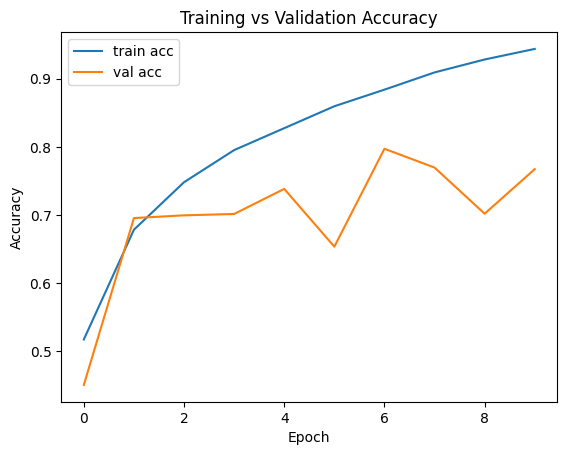

In [10]:
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training vs Validation Accuracy")
plt.show()
